<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**

### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('bike-share.csv')
# Rename the columns
column_names = {'instant': 'index', 'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'temp': 'norm_temp',
                'atemp': 'norm_feeltemp', 'hum': 'norm_humidity', 'windspeed': 'norm_windspeed', 'cnt': 'count'}
df.rename(columns=column_names, inplace=True)
df.set_index(['index'], inplace=True)

print('Default data types:\n', df.dtypes)

# Denormalize some columns
df['temp'] = df['norm_temp'].apply(lambda x: round(x * 41))
df['feeltemp'] = df['norm_feeltemp'].apply(lambda x: round(x * 50))
df['humidity'] = df['norm_humidity'].apply(lambda x: round(x * 100))
df['windspeed'] = df['norm_windspeed'].apply(lambda x: round(x * 67))
# Convert the categorical attributes to string type
df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']] = df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']].astype(str)

df.head()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Default data types:
 date               object
season              int64
year                int64
month               int64
holiday             int64
weekday             int64
workingday          int64
weathersit          int64
norm_temp         float64
norm_feeltemp     float64
norm_humidity     float64
norm_windspeed    float64
casual              int64
registered          int64
count               int64
dtype: object


,date,season,year,month,holiday,weekday,workingday,weathersit,norm_temp,norm_feeltemp,norm_humidity,norm_windspeed,casual,registered,count,temp,feeltemp,humidity,windspeed
index,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14,18,81,11
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,15,18,70,17
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8,9,44,17
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8,11,59,11
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9,11,44,13


In [4]:
# Check data type
print(df.dtypes)

date               object
season             object
year               object
month              object
holiday            object
weekday            object
workingday         object
weathersit         object
norm_temp         float64
norm_feeltemp     float64
norm_humidity     float64
norm_windspeed    float64
casual              int64
registered          int64
count               int64
temp                int64
feeltemp            int64
humidity            int64
windspeed           int64
dtype: object


<span style="color:blue">
    
### YOUR ANSWER HERE
+ Firstly, load the dataset to a DataFrame and rename the columns to make them more informative.  

|Original name|instant|dteday|yr|mnth|temp|atemp|hum|windspeed|cnt|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**New name**|index|date|year|month|norm_temp|norm_feeltemp|norm_humidity|norm_windspeed|count|

+ Set the column `index` as the index of the DataFrame.  
<br>
+ The values of columns `norm_temp`, `norm_feeltemp`, `norm_humidity`, `norm_windspeed` are normalized data, which are denormalized by multiplying 41, 50, 100, 67 and rounded to integer to create new columns `temp`, `feeltemp`, `humidity`, `windspeed`.  
<br>
+ The categorical attributes (`season`, `year`, `month`, `holiday`, `weekday`, `workingday`, `weathersit`) are loaded as numerical attributes by default, which can be converted to string type.  
<br>
+ We can't ensure whether the attributes are useful in the data analysis and machine learning tasks, so all the attributes should not be removed.

</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

In [5]:
# YOUR CODE HERE

# Check if any value is NaN
print('Check NaN value exists? -', df.isnull().values.any())

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Check NaN value exists? - False


In [6]:
# Describe the categorical data
df[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']].describe()

,season,year,month,holiday,weekday,workingday,weathersit
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,3,1,7,0,6,1,1
freq,188,366,62,710,105,500,463


In [7]:
# Describe the numerical data
df[['temp', 'feeltemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe().round(2)

,temp,feeltemp,humidity,windspeed,casual,registered,count
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,20.31,23.74,62.79,12.77,848.18,3656.17,4504.35
std,7.53,8.14,14.26,5.19,686.62,1560.26,1937.21
min,2.00,4.00,0.00,2.00,2.00,20.00,22.00
25%,14.00,17.00,52.00,9.00,315.50,2497.00,3152.00
50%,20.00,24.00,63.00,12.00,713.00,3662.00,4548.00
75%,27.00,30.00,73.00,16.00,1096.00,4776.50,5956.00
max,35.00,42.00,97.00,34.00,3410.00,6946.00,8714.00


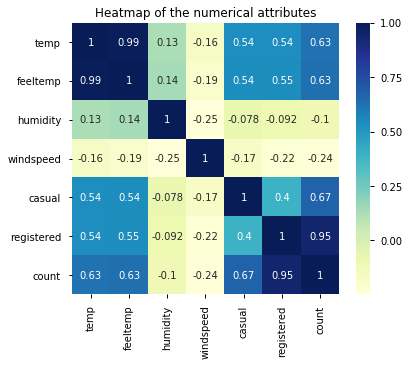

In [8]:
plt.figure(figsize=(6, 5))
corr = df[['temp', 'feeltemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Heatmap of the numerical attributes')
plt.show()

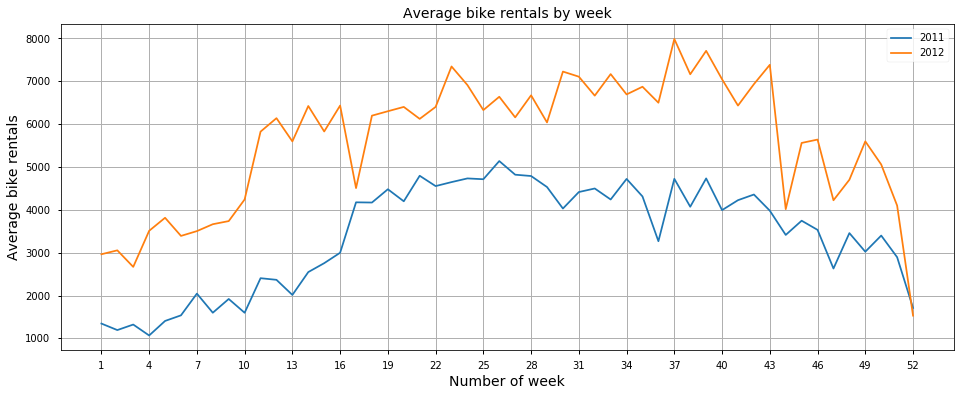

In [9]:
def weekly_average_of_year(year: str) -> pd.DataFrame:
    week_counter = 0
    day_counter = 0
    week_sum = 0
    df_week = pd.DataFrame(columns=['week', 'mean'])
    df_year = df[df['year'] == year]

    for row in df_year.itertuples():
        week_sum += row.count
        day_counter += 1
        if day_counter == 7:
            day_counter = 0
            week_counter += 1
            df_week.loc[week_counter] = [week_counter, round(week_sum / 7)]
            week_sum = 0
    return df_week


df_week0 = weekly_average_of_year('0')
df_week1 = weekly_average_of_year('1')

plt.figure(figsize=(16, 6))
plt.plot(df_week0['week'], df_week0['mean'], label='2011')
plt.plot(df_week1['week'], df_week1['mean'], label='2012')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(1, 53, 3))
plt.xlabel('Number of week', fontsize=14)
plt.ylabel('Average bike rentals', fontsize=14)
plt.title('Average bike rentals by week', fontsize=14)
plt.show()
        

<span style="color:blue">
    
### YOUR ANSWER HERE
+ Check if the DataFrame contains NaN values by `df.isnull().values.any()`. It turns out that there is no NaN value.  
<br>
+ Use the `describe()` function of pandas to investigate the categorical attributes and the numerical attributes respectively. For the categorical attributes, I found that there are only **3 unique values** in `weathersit` although it is declared to have 4 unique valid values. I also noticed that people have to work 500 days during 2011-2012, and 2012 is a leap year. For the numerical attributes, we can see the count, mean, std and 5-number-summary.  
<br>
+ Then we can explore the correlation to understand the relationship between the numerical attributes by the `heatmap` of seaborn. Deeper colors represent stronger correlation. It is noticeable that the number of bikes rented (`registered`, `casual`, `count`) is associated with temperature (`temp`, `feeltemp`). The correlation rate (0.95) between `registered` and `count` indicates that registered users contribute far more than the casual users to the number of bikes rented. We can also see that `feeltemp` (feeling temperature) is tightly associated with `temp`.  
<br>
+ To get a whole picture of the dataset, I draw a line plot which is the weekly average bike rentals during the two years. It shows that the weekly average bike rentals of 2012 is significantly higher than that of 2011, which is a positive signal for the related bike sharing companies.  

</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

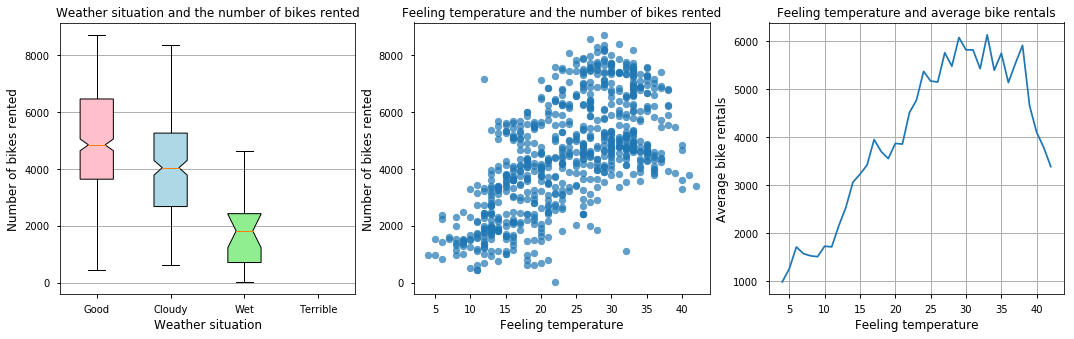

In [10]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
w1 = df[df['weathersit'] == '1']['count']
w2 = df[df['weathersit'] == '2']['count']
w3 = df[df['weathersit'] == '3']['count']
w4 = df[df['weathersit'] == '4']['count']
weather_names = ['Good', 'Cloudy', 'Wet', 'Terrible']
sp1 = ax1.boxplot([w1, w2, w3, w4], labels=weather_names, patch_artist=True, notch=True)

colors = ['pink', 'lightblue', 'lightgreen', 'yellow']
for patch, color in zip(sp1['boxes'], colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Weather situation', fontsize=12)
ax1.set_ylabel('Number of bikes rented', fontsize=12)
ax1.set_title('Weather situation and the number of bikes rented', fontsize=12)

ax2 = fig.add_subplot(132)
ax2.scatter(df['feeltemp'], df['count'], marker='o', alpha=0.7)
ax2.set_xlabel('Feeling temperature', fontsize=12)
ax2.set_ylabel('Number of bikes rented', fontsize=12)
ax2.set_title('Feeling temperature and the number of bikes rented', fontsize=12)

ax3 = fig.add_subplot(133)
mean_count = df.groupby(['feeltemp'])['count'].mean()
ax3.plot(mean_count.index.values, mean_count.values)
ax3.grid()
ax3.set_xlabel('Feeling temperature', fontsize=12)
ax3.set_ylabel('Average bike rentals', fontsize=12)
ax3.set_title('Feeling temperature and average bike rentals', fontsize=12)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
#### Relationship between weather situation and the number of bikes rented
+ The box plot demonstrates the relationship between weather situation and the number of bikes rented. The weather situations are Good(1), Cloudy(2), Wet(3), Terrible(4), but there isn't any data for terrible weather. As the *five-number summary (the minimum value, the first quartile, the median, the third quartile, and the maximum value)* shows, the better the weather, the more bike rentals. The number of bikes rented drops significantly in wet weather. We can also reasonably infer that the bike rentals would be fewer in terrible weathers in the future.

#### Relationship between outside temperature and the number of bikes rented
+ The scatter plot indicates the distribution of bike rentals in different feeling temperature. We can roughly see a trend that the number of bike rented keeps growing with the temperature increasing, and begins to drop when the temperature reaches around 35 degrees Celsius.  
<br>
+ To further investigate the relationship between temperature and bike rentals, I draw a line plot which shows the average bike rentals in different temperature. The number increases in 3-24 degrees, fluctuates between 24-38 degrees, and decreases after 38 degrees. People prefer to rent bikes in comfortable temperature rather than too cold or too hot days.

</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

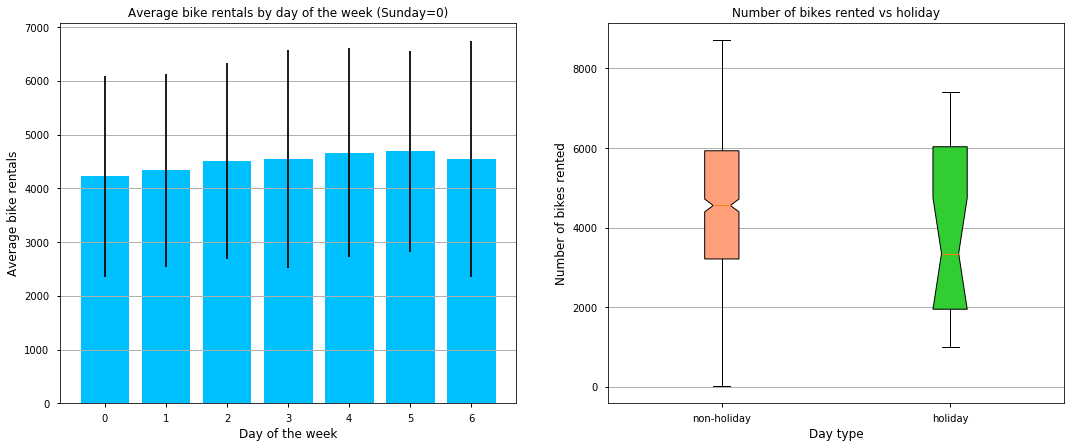

In [11]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18, 7))
ax1 = fig.add_subplot(121)
mean_count = df.groupby(['weekday'])['count'].agg([np.mean, np.std])
ax1.bar(mean_count.index.values, mean_count['mean'], yerr=mean_count['std'], color='deepskyblue')
ax1.yaxis.grid(True)
ax1.set_xlabel('Day of the week', fontsize=12)
ax1.set_ylabel('Average bike rentals', fontsize=12)
ax1.set_title('Average bike rentals by day of the week (Sunday=0)', fontsize=12)

ax2 = fig.add_subplot(122)
h0 = df[df['holiday'] == '0']['count']
h1 = df[df['holiday'] == '1']['count']
hb = ax2.boxplot([h0, h1], labels=['non-holiday', 'holiday'], patch_artist=True, notch=True)

colors = ['lightsalmon', 'limegreen']
for patch, color in zip(hb['boxes'], colors):
    patch.set_facecolor(color)

ax2.yaxis.grid(True)
ax2.set_xlabel('Day type', fontsize=12)
ax2.set_ylabel('Number of bikes rented', fontsize=12)
ax2.set_title('Number of bikes rented vs holiday', fontsize=12)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [12]:
print('Number of non-holidays: %d' % len(h0.index))
print('Number of holidays: %d' % len(h1.index))

Number of non-holidays: 710
Number of holidays: 21


<span style="color:blue">
    
### YOUR ANSWER HERE
#### Relationship between the day of the week and the number of bikes rented
+ The bar plot demonstrates the average bike rentals by day of the week. The average values are very similar to each other (within 4000-5000). The value in Sunday is the least while Friday has the highest value. The error bars also show similar variability in different days of week.

#### Relationship between holiday and the number of bikes rented
+ In the given dataset we have 710 records for non-holiday and 21 records for holiday. Although there isn't much data for holiday, we still can capture the distribution of bike rentals in non-holidays and holidays. The box plot shows that fewer people would like to rent bikes in holidays on average. In addition, the red box is shorter than the green box, which means that the data of non-holiday has a greater proportion of values that centralized around the mean.

</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

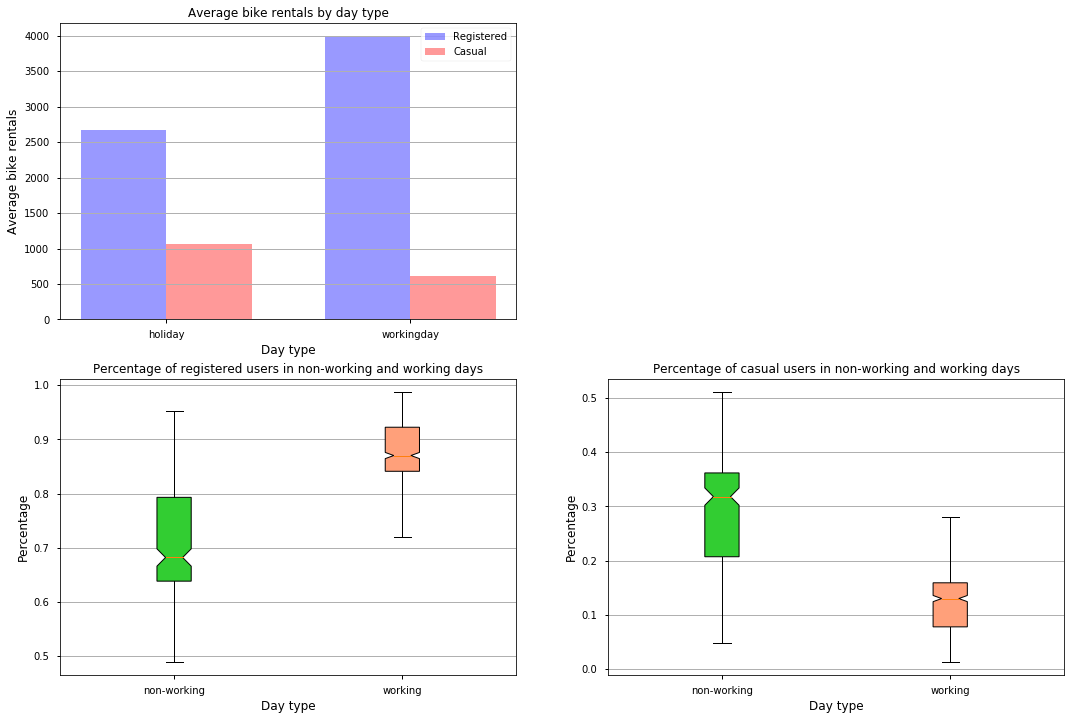

In [13]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(221)
mean_holiday = df[df['holiday'] == '1'][['registered', 'casual']].mean()
mean_workday = df[df['workingday'] == '1'][['registered', 'casual']].mean()
y_data = [[mean_holiday['registered'], mean_workday['registered']], [mean_holiday['casual'], mean_workday['casual']]]

index = np.arange(2)
bar_width = 0.35

ax1.bar(index, y_data[0], bar_width, alpha=0.4, color='b', label='Registered')
ax1.bar(index + bar_width, y_data[1], bar_width, alpha=0.4, color='r', label='Casual')
ax1.legend(loc='best')
ax1.yaxis.grid(True)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(('holiday', 'workingday'))
ax1.set_xlabel('Day type', fontsize=12)
ax1.set_ylabel('Average bike rentals', fontsize=12)
ax1.set_title('Average bike rentals by day type', fontsize=12)

# box plots
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df_work = df[df['workingday'] == '1']
df_nonwork = df[df['workingday'] == '0']
proportion_reg_work = np.true_divide(df_work['registered'], df_work['count'])
proportion_reg_nonwork = np.true_divide(df_nonwork['registered'], df_nonwork['count'])
proportion_cas_work = np.true_divide(df_work['casual'], df_work['count'])
proportion_cas_nonwork = np.true_divide(df_nonwork['casual'], df_nonwork['count'])

bp1 = ax3.boxplot([proportion_reg_nonwork, proportion_reg_work], labels=['non-working', 'working'], patch_artist=True, notch=True)
bp2 = ax4.boxplot([proportion_cas_nonwork, proportion_cas_work], labels=['non-working', 'working'], patch_artist=True, notch=True)
colors = ['limegreen', 'lightsalmon']
for patch1, patch2, color in zip(bp1['boxes'], bp2['boxes'], colors):
    patch1.set_facecolor(color)
    patch2.set_facecolor(color)

ax3.yaxis.grid(True)
ax3.set_xlabel('Day type', fontsize=12)
ax3.set_ylabel('Percentage', fontsize=12)
ax3.set_title('Percentage of registered users in non-working and working days', fontsize=12)

ax4.yaxis.grid(True)
ax4.set_xlabel('Day type', fontsize=12)
ax4.set_ylabel('Percentage', fontsize=12)
ax4.set_title('Percentage of casual users in non-working and working days', fontsize=12)


# fig.tight_layout()
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
+ The bar plot illustrates the average bike rentals of registered users and casual users in holidays and working days. In working days, the average bike rentals of registered users is approximately 6 times of the casual users. In holidays, the figure of registered users drop by one third, becoming about 2.6 times of the casual users.  
<br>
+ To get a better understanding of the comparison between the bike rentals of registered user and casual user, I draw two box plots whose y axis is the percentage value. For these plots, the data is divided as working days and non-working days rather than holidays and working days. We can see that in working days, the bike rentals of registered user is the overwhelming part (often more than 84%). In non-working days, the average percentage of registered user drops a lot. We can reasonably infer that there are quite a lot bike commuters. In addition, some other commuters would like to rent bikes on non-working days.
</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

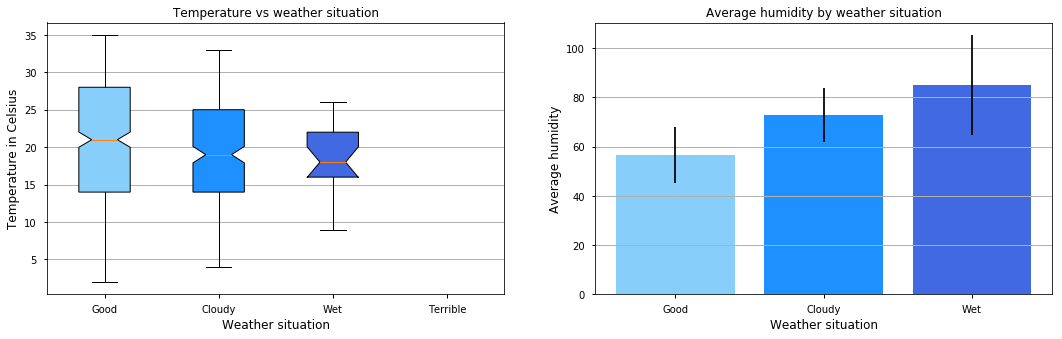

In [14]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
w1 = df[df['weathersit'] == '1']['temp']
w2 = df[df['weathersit'] == '2']['temp']
w3 = df[df['weathersit'] == '3']['temp']
w4 = df[df['weathersit'] == '4']['temp']
sp1 = ax1.boxplot([w1, w2, w3, w4], labels=weather_names, patch_artist=True, notch=True)

weather_colors = ['lightskyblue', 'dodgerblue', 'royalblue', 'darkblue']
for patch, color in zip(sp1['boxes'], weather_colors):
    patch.set_facecolor(color)

ax1.yaxis.grid(True)
ax1.set_xlabel('Weather situation', fontsize=12)
ax1.set_ylabel('Temperature in Celsius', fontsize=12)
ax1.set_title('Temperature vs weather situation', fontsize=12)

ax2 = fig.add_subplot(122)
mean_humidity = df.groupby(['weathersit'])['humidity'].agg([np.mean, np.std])
ax2.bar(weather_names[:3], mean_humidity['mean'], yerr=mean_humidity['std'], color=weather_colors)
ax2.yaxis.grid(True)
# ax2.set_xlabel(seasons)
ax2.set_xlabel('Weather situation', fontsize=12)
ax2.set_ylabel('Average humidity', fontsize=12)
ax2.set_title('Average humidity by weather situation', fontsize=12)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

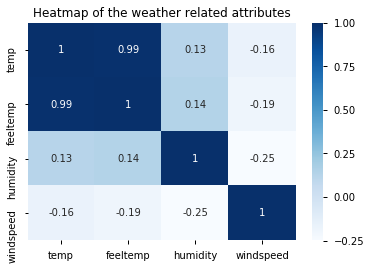

In [15]:
corr = df[['temp', 'feeltemp', 'humidity', 'windspeed']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap of the weather related attributes')
plt.show()

<span style="color:blue">
    
### YOUR ANSWER HERE
+ The box plot shows the relationship between weather situation and temperature. The more wetter (worse weather situation), the lower the average temperature.  
<br>
+ The bar plot shows the relationship between weather situation and average humidity. The more wetter (worse weather situation), the higher the average humidity. The variability of humidity in wet days is greater than that of good and cloudy days.  
<br>
+ The heatmap indicates that windspeed and humidity have little influence on temperature. What's more, the feeling temperature almost has a liner relationship with the temperature.
</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

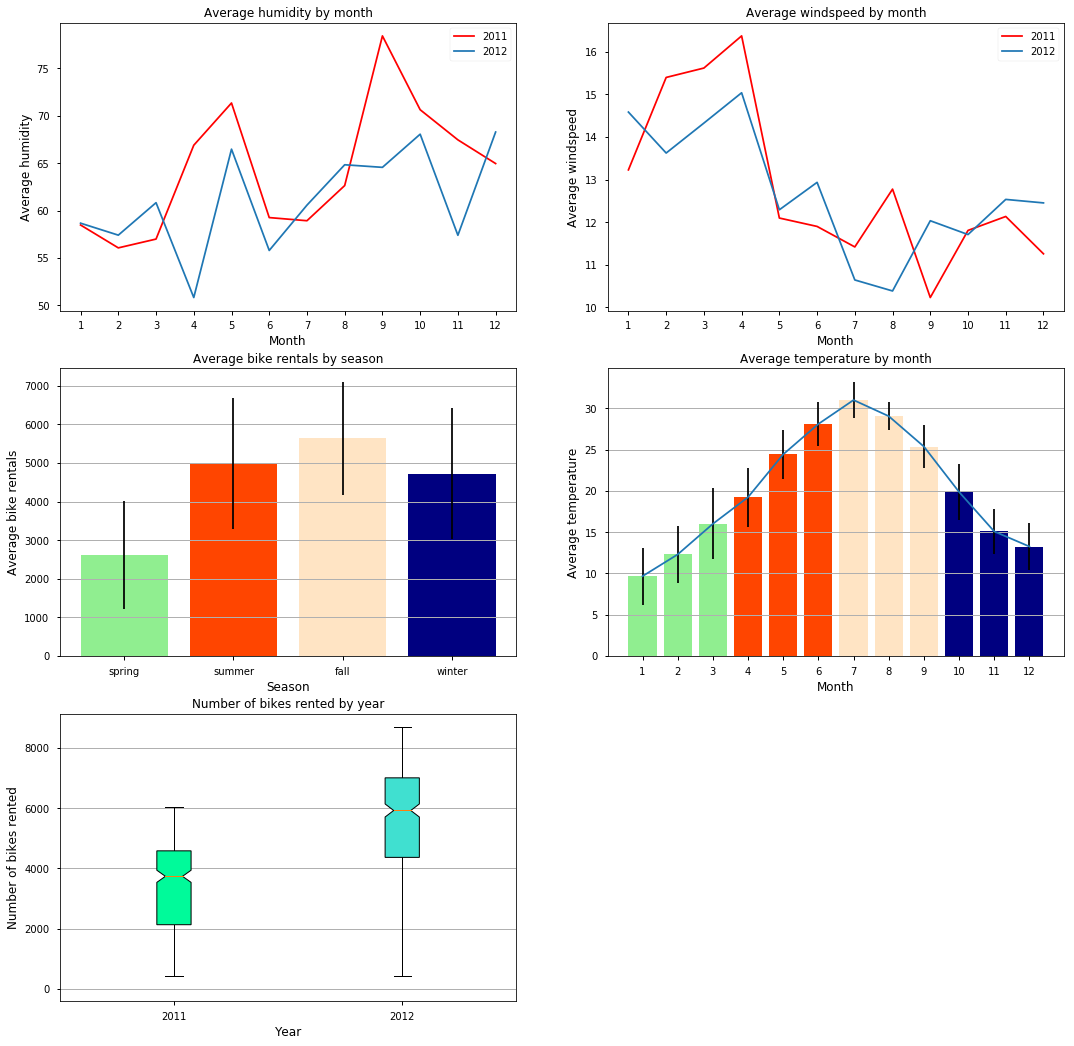

In [16]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18, 18))
m = [str(x) for x in np.arange(1, 13)]
ax1 = fig.add_subplot(321)
mean_hum0 = df[df['year'] == '0'].groupby(['month'])['humidity'].mean()
mean_hum0 = mean_hum0.reindex(index=m)
mean_hum1 = df[df['year'] == '1'].groupby(['month'])['humidity'].mean()
mean_hum1 = mean_hum1.reindex(index=m)
ax1.plot(mean_hum0.index.values, mean_hum0.values, label='2011', color='r')
ax1.plot(mean_hum1.index.values, mean_hum1.values, label='2012')
ax1.legend(loc='best')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average humidity', fontsize=12)
ax1.set_title('Average humidity by month', fontsize=12)

ax2 = fig.add_subplot(322)
mean_wind0 = df[df['year'] == '0'].groupby(['month'])['windspeed'].mean()
mean_wind0 = mean_wind0.reindex(index=m)
mean_wind1 = df[df['year'] == '1'].groupby(['month'])['windspeed'].mean()
mean_wind1 = mean_wind1.reindex(index=m)
ax2.plot(mean_wind0.index.values, mean_wind0.values, label='2011', color='r')
ax2.plot(mean_wind1.index.values, mean_wind1.values, label='2012')
ax2.legend(loc='best')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average windspeed', fontsize=12)
ax2.set_title('Average windspeed by month', fontsize=12)

ax3 = fig.add_subplot(323)
mean_count = df.groupby(['season'])['count'].agg([np.mean, np.std])
season_names = ['spring', 'summer', 'fall', 'winter']
season_colors = ['lightgreen', 'orangered', 'bisque', 'navy']
ax3.bar(season_names, mean_count['mean'], yerr=mean_count['std'], color=season_colors)
ax3.yaxis.grid(True)
ax3.set_xlabel('Season', fontsize=12)
ax3.set_ylabel('Average bike rentals', fontsize=12)
ax3.set_title('Average bike rentals by season', fontsize=12)


ax4 = fig.add_subplot(324)
mean_temp = df.groupby(['month'])['temp'].agg([np.mean, np.std])
# Make the Series in order 1-12 rather than 1,10,11,12,2-9
mean_temp = mean_temp.reindex(index=m)
month_colors = ['lightgreen', 'lightgreen', 'lightgreen', 'orangered', 'orangered', 'orangered', 'bisque', 'bisque', 'bisque', 'navy', 'navy', 'navy']
ax4.bar(mean_temp.index.values, mean_temp['mean'], yerr=mean_temp['std'], color=month_colors)
ax4.plot(mean_temp.index.values, mean_temp['mean'])
ax4.yaxis.grid(True)
ax4.set_xlabel('Month', fontsize=12)
ax4.set_ylabel('Average temperature', fontsize=12)
ax4.set_title('Average temperature by month', fontsize=12)

ax5 = fig.add_subplot(325)
year0 = df[df['year'] == '0']['count']
year1 = df[df['year'] == '1']['count']
sp1 = ax5.boxplot([year0, year1], labels=['2011', '2012'], patch_artist=True, notch=True)

colors = ['mediumspringgreen', 'turquoise']
for patch, color in zip(sp1['boxes'], colors):
    patch.set_facecolor(color)

ax5.yaxis.grid(True)
ax5.set_xlabel('Year', fontsize=12)
ax5.set_ylabel('Number of bikes rented', fontsize=12)
ax5.set_title('Number of bikes rented by year', fontsize=12)

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
+ The first line plot demonstrates the average humidity by month of the two years. The wetest months are May, September and October. It is noticeable that the average humidity of September of 2011 is very high.  
<br>
+ The second line plot demonstrates the average windspeed by month of the two years. It tells that the wind is stronger in January to April, but weak in September.  
<br>
+ The first bar plot tells the average bike rentals by season. It is surprising that spring has very low bike rentals and fall has the highest value. The reason behinds this phenomenon is investigated in the next plot.    
<br>
+ The second bar plot illustrates the average temperature by month during the two years. We can find that the average temperature in January, February and March is very low, which causes low bike rentals. The number of bikes rented goes up with the increase of average temperature. In addition, it is reasonable to doubt whether the dataset description of season is correct in the README file. The correct corrsponding relation seems to be 1-winter, 2-spring, 3-summer and 4-fall. The issue deserves to be submitted to the author of the dataset.  
<br>
+ The box plot shows the number of bikes rented by year. Obviously, the bike sharing companies achieved an improvement on sales in 2012. There is a trend that bike sharing is becoming more popular.

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [17]:
# YOUR CODE HERE

# Use one-hot encoding for the categorical attributes
cat_columns=['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

df_dummy = pd.get_dummies(df, columns=cat_columns)
features = [col for col in df_dummy.columns \
            if col not in ['count', 'casual', 'registered', 'date', 'temp', 'feeltemp', 'humidity', 'windspeed']]

X = df_dummy[features]
y = df_dummy['count']

# Split the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The root mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Root mean squared error: 774.27
Variance score: 0.85


<span style="color:blue">
    
### YOUR ANSWER HERE
#### Feature attributes and the target attribute
+ The `count` attribute is the the target of the line regression model.  
+ `season`, `year`, `month`, `holiday`, `weekday`, `workingday`, `weathersit`, `norm_temp`, `norm_feeltemp`, `norm_humidity`, `norm_windspeed` are selected as the features.

#### Data pre-processing
+ `norm_temp`, `norm_feeltemp`, `norm_humidity`, `norm_windspeed` have already been normalized.  
+ `season`, `year`, `month`, `holiday`, `weekday`, `workingday`, `weathersit` are categorical attributes, which should not be fed to the model directly. For example, `season=1` and `season=4` should not be simply treated as integers because the numbers just represent different categories. To solve this issue, **one-hot encoding** technique is applied on all the categorical attributes.  
+ Split the dataset to *train set (70%)* and *test set (30%)* by the function `train_test_split` of sklearn. To make the results reproducible, the `random_state` is set to 42.  

#### Train the model
+ The linear regression model is trained on the train set.

#### Evaluation
+ The **root mean square error (RMSE)** measures the differences between values predicted by the model and the values actually observed. The RMSE of my model is 774, which is good enough for a linear model. I also tested different combinations of the features. However, those feature combinations didn't perform better than the model being used.  
+ **R-squared score** explains how good is the model when compared to the baseline model. This score can take value between 0 and 1 where values closer to 0 represent a poor fit while values closer to 1 represent a perfect fit. The score of my model is 0.85, which is a relatively good fit.

</span>